In [1]:
include("cutoff.jl")

plot_single_coordinate_over_time (generic function with 1 method)

In [5]:
N = 8
X₀ = rand(Uniform(-1, 1), N)
num_chains = 100000
# Dist = Uniform(-1/√N, 1/√N)
# Dist = Normal(0.0, 1)
# Dist = Normal(0.0, 1/√N)
# activation = σ
# activation = tanh
step_size = 0.001
num_steps = 20
forward = true
store_steps = false

# Dists = [Uniform(-1/√N, 1/√N), Normal(0.0, 1/√N)]
# activations = [σ, tanh]

# for Dist in Dists
#     for activation in activations
#         Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps, forward, store_steps)
#         Results = ExperimentResults([], [], [])

#         run_and_plot_tvds(Exp, Results, verbose=false, save=true)
#     end
# end

false

Taking Step 1 of 20 steps
Taking Step 2 of 20 steps
Taking Step 3 of 20 steps
Taking Step 4 of 20 steps
Taking Step 5 of 20 steps
Taking Step 6 of 20 steps
Taking Step 7 of 20 steps
Taking Step 8 of 20 steps
Taking Step 9 of 20 steps
Taking Step 10 of 20 steps
Taking Step 11 of 20 steps
Taking Step 12 of 20 steps
Taking Step 13 of 20 steps
Taking Step 14 of 20 steps
Taking Step 15 of 20 steps
Taking Step 16 of 20 steps
Taking Step 17 of 20 steps
Taking Step 18 of 20 steps
Taking Step 19 of 20 steps
Taking Step 20 of 20 steps


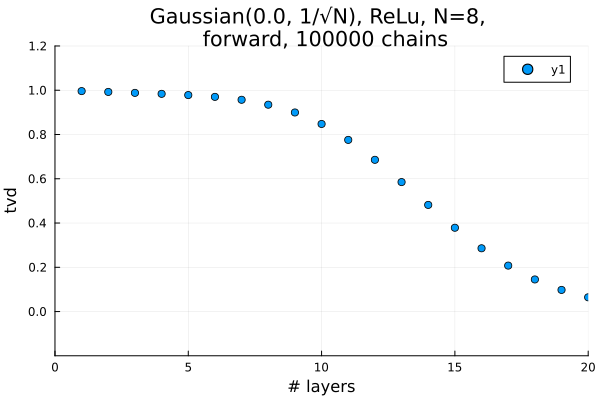

In [6]:
Dist = Normal(0.0, 1/√N)
activation = σ

Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps, forward, store_steps)
Results = ExperimentResults([], [], [])

run_and_plot_tvds(Exp, Results, verbose=true, save=false)